# Problem Statement

A city in central Iowa, United States, Ames hosts a population of 65,000 residents. Best known for being the home of the Iowa State University(ISU), Ames was also ranked ninth on a (["Best Places to Live"](https://money.cnn.com/magazines/moneymag/bplive/2010/snapshots/PL1901855.html)) list. For people looking to root in Iowa, a property doubles as a home as well as an investment. When people pick out homes, or do renovations, it's entirely possible to lose out on the investment by overpaying for bad property, or by making bad decisions during renovations. 

This project aims to find `which variables predict the valuation of property` in Ames, Iowa for homeseekers to make better decisions during purchasing by understanding how property features tie in to property valuation.

This project aims to solve this problem by utilizing regression models to determine the features that can influence the price of property in Ames and to which extent these features predict the prices. <br/>Divided into two Jupyer Notebooks: The first in which I clean the data, and the second where I plot out the data and fit it to models to isolate and define the extent of variables & their interconnected relationships in determining the price of the property. 


### Content

- [Dealing With Nulls](#Dealing-With-Nulls)
- [Change ordinal to numerical](#Change-ordinal-to-numerical)
- [One Hot Encoding for Categoricals](#One-Hot-Encoding-for-Categoricals)
- [Repeating Everything for Test Data](#Test-Data)

# Data Dictionary
The Data Dictionary can be found ([here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data))

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [3]:
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

In [4]:
test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')

In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(879, 80)

In [7]:
train.columns[:-1] == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
test.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [10]:
train.dtypes

id                 int64
pid                int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
street            object
alley             object
lotshape          object
landcontour       object
utilities         object
lotconfig         object
landslope         object
neighborhood      object
condition1        object
condition2        object
bldgtype          object
housestyle        object
overallqual        int64
overallcond        int64
yearbuilt          int64
yearremod/add      int64
roofstyle         object
roofmatl          object
exterior1st       object
exterior2nd       object
masvnrtype        object
masvnrarea       float64
exterqual         object
extercond         object
foundation        object
bsmtqual          object
bsmtcond          object
bsmtexposure      object
bsmtfintype1      object
bsmtfinsf1       float64
bsmtfintype2      object
bsmtfinsf2       float64
bsmtunfsf        float64
totalbsmtsf      float64


In [11]:
train.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

Upon checking the data dictionary, it seems that most of the object or non-numerical data types are categorical or ordinal. I will strategize a way to deal with them after I deal with the nulls so I can EDA to have a better look at the distribution. 

# Dealing With Nulls

In [12]:
def null_count(df):
    df_null_columns = df.columns[df.isnull().any()]
    null_count = df[df_null_columns].isnull().sum().sort_values(ascending=False)
    return null_count

In [13]:
null_count(train)

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
lotfrontage      330
garageyrblt      114
garagecond       114
garagequal       114
garagefinish     114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtcond          55
bsmtqual          55
bsmtfintype1      55
masvnrtype        22
masvnrarea        22
bsmthalfbath       2
bsmtfullbath       2
garagecars         1
bsmtfinsf1         1
bsmtfinsf2         1
bsmtunfsf          1
garagearea         1
totalbsmtsf        1
dtype: int64

Since there are a lot of columns, let's start with the numerical ones.

In [14]:
null_cols = null_count(train).index

In [15]:
train[null_cols]

,poolqc,miscfeature,alley,fence,fireplacequ,lotfrontage,garageyrblt,garagecond,garagequal,garagefinish,garagetype,bsmtexposure,bsmtfintype2,bsmtcond,bsmtqual,bsmtfintype1,masvnrtype,masvnrarea,bsmthalfbath,bsmtfullbath,garagecars,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,garagearea,totalbsmtsf
0,NaN,NaN,NaN,NaN,NaN,NaN,1976.0,TA,TA,RFn,Attchd,No,Unf,TA,TA,GLQ,BrkFace,289.0,0.0,0.0,2.0,533.0,0.0,192.0,475.0,725.0
1,NaN,NaN,NaN,NaN,TA,43.0,1997.0,TA,TA,RFn,Attchd,No,Unf,TA,Gd,GLQ,BrkFace,132.0,0.0,1.0,2.0,637.0,0.0,276.0,559.0,913.0
2,NaN,NaN,NaN,NaN,NaN,68.0,1953.0,TA,TA,Unf,Detchd,No,Unf,TA,TA,GLQ,None,0.0,0.0,1.0,1.0,731.0,0.0,326.0,246.0,1057.0
3,NaN,NaN,NaN,NaN,NaN,73.0,2007.0,TA,TA,Fin,BuiltIn,No,Unf,TA,Gd,Unf,None,0.0,0.0,0.0,2.0,0.0,0.0,384.0,400.0,384.0
4,NaN,NaN,NaN,NaN,NaN,82.0,1957.0,TA,TA,Unf,Detchd,No,Unf,Gd,Fa,Unf,None,0.0,0.0,0.0,2.0,0.0,0.0,676.0,484.0,676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,NaN,NaN,NaN,NaN,Gd,79.0,2007.0,TA,TA,Fin,Attchd,Av,Unf,TA,Gd,GLQ,None,0.0,0.0,1.0,2.0,1011.0,0.0,873.0,520.0,1884.0
2047,NaN,NaN,NaN,NaN,NaN,NaN,1961.0,TA,TA,Unf,Detchd,No,Unf,TA,TA,BLQ,None,0.0,0.0,0.0,2.0,262.0,0.0,599.0,539.0,861.0
2048,NaN,NaN,NaN,NaN,TA,57.0,1929.0,Fa,Fa,Unf,Detchd,No,Unf,TA,TA,Unf,None,0.0,0.0,0.0,2.0,0.0,0.0,896.0,342.0,896.0
2049,NaN,NaN,NaN,NaN,Gd,80.0,1956.0,TA,TA,Unf,Attchd,No,LwQ,TA,TA,Rec,None,0.0,0.0,1.0,1.0,155.0,750.0,295.0,294.0,1200.0


In [16]:
train[null_cols].dtypes

poolqc           object
miscfeature      object
alley            object
fence            object
fireplacequ      object
lotfrontage     float64
garageyrblt     float64
garagecond       object
garagequal       object
garagefinish     object
garagetype       object
bsmtexposure     object
bsmtfintype2     object
bsmtcond         object
bsmtqual         object
bsmtfintype1     object
masvnrtype       object
masvnrarea      float64
bsmthalfbath    float64
bsmtfullbath    float64
garagecars      float64
bsmtfinsf1      float64
bsmtfinsf2      float64
bsmtunfsf       float64
garagearea      float64
totalbsmtsf     float64
dtype: object

In [17]:
train[train['totalbsmtsf'].isnull()]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


Looking at the entry, it seems that most of the basement related entries are null values. It's likely that this might've been an intentional omission to say that there is no basement. I will attempt to group the basement null entries together to better understand how to interpret the nulls to properly fill them. 

In [18]:
bsmt = ['bsmtqual','bsmtcond','bsmtexposure', 'bsmtfintype1','bsmtfinsf1','bsmtfintype2','bsmtfinsf2','bsmtunfsf','totalbsmtsf','bsmthalfbath','bsmtfullbath']

In [19]:
bsmt_nulls = train[train[bsmt].isna().any(axis=1)]
bsmt_nulls[bsmt].head(100)

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,bsmthalfbath,bsmtfullbath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


Other than entry 1147, 1456, 1547, 1997, all of the entries on this list have mostly null values, it can be inferred that there is no basement. 

After dealing with those entries.
- bsmt object dtypes will be filled with NA as per the data dictionary
- bsmt floats will be filled with 0

In [20]:
train[bsmt].dtypes

bsmtqual         object
bsmtcond         object
bsmtexposure     object
bsmtfintype1     object
bsmtfinsf1      float64
bsmtfintype2     object
bsmtfinsf2      float64
bsmtunfsf       float64
totalbsmtsf     float64
bsmthalfbath    float64
bsmtfullbath    float64
dtype: object

#### Basement 1147

In [21]:
train['bsmtfintype2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfintype2, dtype: int64

In [22]:
train[bsmt].loc[1147]

bsmtqual          Gd
bsmtcond          TA
bsmtexposure      No
bsmtfintype1     GLQ
bsmtfinsf1      1124
bsmtfintype2     NaN
bsmtfinsf2       479
bsmtunfsf       1603
totalbsmtsf     3206
bsmthalfbath       0
bsmtfullbath       1
Name: 1147, dtype: object

It can be inferred that there is a second basement from bsmtfinsf2, since there's no good way to interpret the quality of the basement, I will append the mode of average "Rec" room.

In [23]:
train.loc[1147,'bsmtfintype2'] = 'Rec'

In [24]:
train[bsmt].loc[1147]

bsmtqual          Gd
bsmtcond          TA
bsmtexposure      No
bsmtfintype1     GLQ
bsmtfinsf1      1124
bsmtfintype2     Rec
bsmtfinsf2       479
bsmtunfsf       1603
totalbsmtsf     3206
bsmthalfbath       0
bsmtfullbath       1
Name: 1147, dtype: object

#### Basement 1456


In [25]:
train[bsmt].loc[1456]

bsmtqual         Gd
bsmtcond         TA
bsmtexposure    NaN
bsmtfintype1    Unf
bsmtfinsf1        0
bsmtfintype2    Unf
bsmtfinsf2        0
bsmtunfsf       725
totalbsmtsf     725
bsmthalfbath      0
bsmtfullbath      0
Name: 1456, dtype: object

In [26]:
#Checking the counts of bsmtexposure to get a better understanding of the value I should append.
train['bsmtexposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmtexposure, dtype: int64

In [27]:
train.loc[1456,'bsmtexposure'] = 'NA'

In [28]:
train[bsmt].loc[1456]

bsmtqual         Gd
bsmtcond         TA
bsmtexposure     NA
bsmtfintype1    Unf
bsmtfinsf1        0
bsmtfintype2    Unf
bsmtfinsf2        0
bsmtunfsf       725
totalbsmtsf     725
bsmthalfbath      0
bsmtfullbath      0
Name: 1456, dtype: object

#### Basement 1547

In [29]:
train[bsmt].loc[1547]

bsmtqual          Gd
bsmtcond          TA
bsmtexposure     NaN
bsmtfintype1     Unf
bsmtfinsf1         0
bsmtfintype2     Unf
bsmtfinsf2         0
bsmtunfsf       1595
totalbsmtsf     1595
bsmthalfbath       0
bsmtfullbath       0
Name: 1547, dtype: object

In [30]:
train.loc[1547,'bsmtexposure'] = 'NA'

In [31]:
train['bsmtexposure'][1547]

'NA'

#### Basement 1997

In [32]:
train[bsmt].loc[1997]

bsmtqual         Gd
bsmtcond         TA
bsmtexposure    NaN
bsmtfintype1    Unf
bsmtfinsf1        0
bsmtfintype2    Unf
bsmtfinsf2        0
bsmtunfsf       936
totalbsmtsf     936
bsmthalfbath      0
bsmtfullbath      0
Name: 1997, dtype: object

In [33]:
train.loc[1997,'bsmtexposure'] = 'NA'
train[bsmt].loc[1997]

bsmtqual         Gd
bsmtcond         TA
bsmtexposure     NA
bsmtfintype1    Unf
bsmtfinsf1        0
bsmtfintype2    Unf
bsmtfinsf2        0
bsmtunfsf       936
totalbsmtsf     936
bsmthalfbath      0
bsmtfullbath      0
Name: 1997, dtype: object

### The rest of Basement Nulls

In [34]:
train[bsmt].isnull().sum()

bsmtqual        55
bsmtcond        55
bsmtexposure    55
bsmtfintype1    55
bsmtfinsf1       1
bsmtfintype2    55
bsmtfinsf2       1
bsmtunfsf        1
totalbsmtsf      1
bsmthalfbath     2
bsmtfullbath     2
dtype: int64

In [35]:
base_null_obj = train[bsmt].select_dtypes(object).columns
base_null_obj

Index(['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2'], dtype='object')

In [36]:
for i in base_null_obj:
    train[i].fillna('NA', inplace=True)

In [37]:
train[bsmt].isnull().sum()

bsmtqual        0
bsmtcond        0
bsmtexposure    0
bsmtfintype1    0
bsmtfinsf1      1
bsmtfintype2    0
bsmtfinsf2      1
bsmtunfsf       1
totalbsmtsf     1
bsmthalfbath    2
bsmtfullbath    2
dtype: int64

#### bsmt floats

In [38]:
base_null_float = train[bsmt].select_dtypes(float).columns
base_null_float

Index(['bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'bsmthalfbath',
       'bsmtfullbath'],
      dtype='object')

In [39]:
for i in base_null_float:
    train[i].fillna(0, inplace=True)

# Garage

In [40]:
null_count(train)

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
lotfrontage      330
garagecond       114
garagequal       114
garagefinish     114
garageyrblt      114
garagetype       113
masvnrarea        22
masvnrtype        22
garagearea         1
garagecars         1
dtype: int64

In [41]:
garage = ['garagecond', 'garagequal', 'garagefinish', 'garageyrblt', 'garagetype', 'garagearea','garagecars']

In [42]:
train[garage].dtypes

garagecond       object
garagequal       object
garagefinish     object
garageyrblt     float64
garagetype       object
garagearea      float64
garagecars      float64
dtype: object

In [43]:
garage_nulls = train[train[garage].isna().any(axis=1)]
garage_nulls[garage].head(200)

,garagecond,garagequal,garagefinish,garageyrblt,garagetype,garagearea,garagecars
28,NaN,NaN,NaN,NaN,NaN,0.0,0.0
53,NaN,NaN,NaN,NaN,NaN,0.0,0.0
65,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
101,NaN,NaN,NaN,NaN,NaN,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0
120,NaN,NaN,NaN,NaN,NaN,0.0,0.0
134,NaN,NaN,NaN,NaN,NaN,0.0,0.0
136,NaN,NaN,NaN,NaN,NaN,0.0,0.0


- 1712 is problematic as it lists a Detached Garage without any other information. 

In [44]:
train[garage].describe()

,garageyrblt,garagearea,garagecars
count,1937.000000,2050.000000,2050.000000
mean,1978.707796,473.671707,1.776585
std,25.441094,215.934561,0.764537
min,1895.000000,0.000000,0.000000
25%,1961.000000,319.000000,1.000000
50%,1980.000000,480.000000,2.000000
75%,2002.000000,576.000000,2.000000
max,2207.000000,1418.000000,5.000000


In [45]:
garage_null_float = train[garage].select_dtypes(float).columns
garage_null_float

Index(['garageyrblt', 'garagearea', 'garagecars'], dtype='object')

In [46]:
garage_null_object = train[garage].select_dtypes(object).columns
garage_null_object

Index(['garagecond', 'garagequal', 'garagefinish', 'garagetype'], dtype='object')

In [47]:
train['garageyrblt'].value_counts().head()

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
Name: garageyrblt, dtype: int64

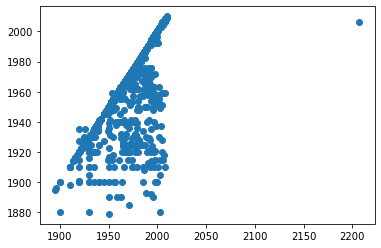

In [48]:
plt.scatter(train['garageyrblt'], train['yearbuilt']);

In [49]:
#Most of them seem to be built in the same year 
(train['garageyrblt'] == train['yearbuilt']).sum() / len(train['garageyrblt'])*100

76.25548512920527

Since 76% of garages were built within the same year as the house, I will remove the outlier from year 2200+ & subsequently replace entry 1712 null with the year the house was built. 

In [50]:
train.loc[train['garageyrblt'] > 2050,['yearbuilt']]

,yearbuilt
1699,2006


In [51]:
#Change the outlier to the year the house was built
train.loc[1699,'garageyrblt'] = 2006

In [52]:
train['yearbuilt'].loc[1712]

1923

In [53]:
train.loc[1712,'garageyrblt'] = 1923

In [54]:
train[garage].loc[1712]

garagecond         NaN
garagequal         NaN
garagefinish       NaN
garageyrblt       1923
garagetype      Detchd
garagearea         NaN
garagecars         NaN
Name: 1712, dtype: object

In [55]:
train[garage_null_float].mode()

,garageyrblt,garagearea,garagecars
0,2005.0,0.0,2.0


Filling the rest of the garage Nulls 

In [56]:
for i in garage_null_object:
    print (train[i].value_counts())

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garagecond, dtype: int64
TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garagequal, dtype: int64
Unf    849
RFn    579
Fin    509
Name: garagefinish, dtype: int64
Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garagetype, dtype: int64


In [57]:
train[garage].loc[1712]

garagecond         NaN
garagequal         NaN
garagefinish       NaN
garageyrblt       1923
garagetype      Detchd
garagearea         NaN
garagecars         NaN
Name: 1712, dtype: object

In [58]:
train.loc[1712,'garagecond'] = 'TA'
train.loc[1712,'garagequal'] = 'TA'
train.loc[1712,'garagefinish'] = 'Unf'

In [59]:
train['garagearea'].mean()

473.6717073170732

In [60]:
train.loc[1712,'garagearea'] = train['garagearea'].mean()
train.loc[1712,'garagecars'] = train['garagecars'].median()

In [61]:
train[garage].loc[1712]

garagecond           TA
garagequal           TA
garagefinish        Unf
garageyrblt        1923
garagetype       Detchd
garagearea      473.672
garagecars            2
Name: 1712, dtype: object

#### Filling the rest of the garagenulls

In [62]:
for i in garage_null_float:
    train[i].fillna(0, inplace=True)

In [63]:
for i in garage_null_object:
    train[i].fillna(0, inplace=True)

# Masonry

In [64]:
null_count(train)

poolqc         2042
miscfeature    1986
alley          1911
fence          1651
fireplacequ    1000
lotfrontage     330
masvnrarea       22
masvnrtype       22
dtype: int64

In [65]:
masonry = ['masvnrtype', 'masvnrarea']

In [66]:
masonry_nulls = train[train[masonry].isna().any(axis=1)]
masonry_nulls[masonry].head(200)

,masvnrtype,masvnrarea
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


Since the null values are in similar rows, I will assume this information was intentionally left out for a lack of. 
<br/>I will replace nulls in 
masvnrtype to 'None' and nulls in masvnrarea to '0'
<br/>Additionally, I will replace all 'None' values in masvnrtype to 'NA'for overall data consistency with other columns.

In [67]:
train[masonry].dtypes

masvnrtype     object
masvnrarea    float64
dtype: object

In [68]:
train['masvnrtype'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: masvnrtype, dtype: int64

In [69]:
train['masvnrtype'].replace('None', 'NA', inplace=True)

In [70]:
train['masvnrtype'].fillna('NA', inplace=True)
train['masvnrarea'].fillna(0,inplace=True)

# Remaining Null Features

In [71]:
null_count(train)

poolqc         2042
miscfeature    1986
alley          1911
fence          1651
fireplacequ    1000
lotfrontage     330
dtype: int64

#### Pool

In [72]:
pool = ['poolqc', 'poolarea']

In [73]:
train['poolqc'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: poolqc, dtype: int64

In [74]:
train[train['poolarea'] > 0]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
52,2351,527356020,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790.0,LwQ,469.0,133.0,1392.0,GasA,TA,Y,SBrkr,1392,1392,0,2784,1.0,0.0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2.0,564.0,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,250000
657,1567,914475020,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522.0,Unf,0.0,574.0,1096.0,GasA,TA,Y,SBrkr,1118,0,0,1118,1.0,0.0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1.0,358.0,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,171000
761,2499,532476050,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,SLvl,7,4,1974,1974,Gable,CompShg,WdShing,Wd Sdng,BrkFace,145.0,Gd,Fa,CBlock,Gd,TA,Gd,ALQ,1023.0,BLQ,497.0,228.0,1748.0,GasA,Gd,Y,SBrkr,2151,495,0,2646,1.0,2.0,2,0,3,1,Gd,9,Mod,4,TA,Attchd,1974.0,RFn,2.0,550.0,TA,TA,Y,641,100,0,0,0,800,Gd,GdPrv,NaN,0,1,2006,WD,260000
952,2231,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,CompShg,WdShing,Plywood,NA,0.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,Gd,Y,SBrkr,2726,0,0,2726,0.0,0.0,2,1,2,1,Gd,6,Typ,1,Gd,Attchd,1986.0,Fin,2.0,691.0,Gd,Gd,Y,216,64,169,0,0,228,Ex,NaN,NaN,0,8,2007,WD,315000
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1130,2358,527377030,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663.0,LwQ,377.0,0.0,1040.0,GasA,Fa,Y,SBrkr,1309,0,0,1309,1.0,0.0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2.0,484.0,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,181000
1249,2736,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,NA,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0.0,Unf,0.0,697.0,697.0,GasA,TA,Y,SBrkr,1575,626,0,2201,0.0,0.0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2.0,432.0,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,274970
1635,1941,535353050,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,CBlock,TA,TA,No,BLQ,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953.0,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,TA,GdPrv,NaN,0,2,2007,WD,153000
1875,2279,923202220,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,NaN,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,TA,Gd

In [75]:
pool_nulls = train[train[pool].isna().any(axis=1)]
pool_nulls[pool].shape

(2042, 2)

Since the data had an original shape of 2051, it seems the 9 entries of poolqc are accounted for and the rest signify no pool. 

In [76]:
train['poolqc'].fillna(0, inplace=True)

#### MiscFeature

In [77]:
train['miscfeature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: miscfeature, dtype: int64

The data dictionary provided stated 'NA' as the value listed for no miscellaneous features. Since 'NA' is missing it's likely the null values represent NA. 

In [78]:
train['miscfeature'].fillna('NA',inplace=True)

#### Alley

In [79]:
train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [80]:
train['alley'].fillna('NA',inplace=True)

#### Fence

In [81]:
train['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [82]:
train['fence'].fillna('NA',inplace=True)

# Fireplace

In [83]:
fireplace = ['fireplacequ', 'fireplaces']

In [84]:
train['fireplacequ'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: fireplacequ, dtype: int64

In [85]:
train['fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

In [86]:
#The null values in fireplacequ are likely to be denote having 0 fireplaces.
(train['fireplaces'].value_counts().sum()) - (train['fireplacequ'].value_counts().sum())

1000

In [87]:
fireplace_nulls = train[train[fireplace].isna().any(axis=1)]
fireplace_nulls[fireplace].head(5)

,fireplacequ,fireplaces
0,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
6,NaN,0


In [88]:
(fireplace_nulls[fireplace] > 0).any()

fireplacequ    False
fireplaces     False
dtype: bool

In [89]:
train['fireplacequ'].fillna('NA',inplace=True)

#### LotFrontage

In [90]:
train['lotfrontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lotfrontage, dtype: float64

In [91]:
(train['lotfrontage'] == 0).any()

False

Since theres not a single instance of 0, it can be inferred that the null values are likely to represent lack of lotfrontage.

In [92]:
train['lotfrontage'].fillna(0, inplace=True)

Just a quick check to see if we're done.

In [93]:
train.isnull().any().sum()

0

# Test Data

In [94]:
test.shape

(879, 80)

In [95]:
null_count(test)

poolqc          875
miscfeature     838
alley           821
fence           707
fireplacequ     422
lotfrontage     160
garageyrblt      45
garagefinish     45
garagequal       45
garagecond       45
garagetype       44
bsmtfintype2     25
bsmtfintype1     25
bsmtexposure     25
bsmtcond         25
bsmtqual         25
masvnrarea        1
masvnrtype        1
electrical        1
dtype: int64

#### Test Basement

In [96]:
test_bsmt_nulls = test[test[bsmt].isna().any(axis=1)]
test_bsmt_nulls[bsmt].head(100)

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,bsmthalfbath,bsmtfullbath
15,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
37,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
77,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
79,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
113,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
145,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
190,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
206,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
279,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
292,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


Most of the values seem null across the board again. I will append them with 'NA' for categorical/ordinal and 0 for float.

In [97]:
for i in base_null_obj:
    test[i].fillna('NA', inplace=True)

In [98]:
for i in base_null_float:
    test[i].fillna('NA', inplace=True)

In [99]:
null_count(test)

poolqc          875
miscfeature     838
alley           821
fence           707
fireplacequ     422
lotfrontage     160
garagecond       45
garagequal       45
garagefinish     45
garageyrblt      45
garagetype       44
electrical        1
masvnrarea        1
masvnrtype        1
dtype: int64

In [100]:
test_garage_nulls = test[test[garage].isna().any(axis=1)]
test_garage_nulls[garage].head(100)

,garagecond,garagequal,garagefinish,garageyrblt,garagetype,garagearea,garagecars
29,NaN,NaN,NaN,NaN,NaN,0,0
45,NaN,NaN,NaN,NaN,NaN,0,0
66,NaN,NaN,NaN,NaN,NaN,0,0
68,NaN,NaN,NaN,NaN,NaN,0,0
106,NaN,NaN,NaN,NaN,NaN,0,0
110,NaN,NaN,NaN,NaN,NaN,0,0
114,NaN,NaN,NaN,NaN,NaN,0,0
145,NaN,NaN,NaN,NaN,NaN,0,0
153,NaN,NaN,NaN,NaN,NaN,0,0
157,NaN,NaN,NaN,NaN,NaN,0,0


Inputing index 765 with the appropriate data similar to 1712 from test.

In [101]:
test_garage_nulls = ['garagecond','garagequal','garagefinish','garageyrblt']

In [103]:
test.loc[765,'garagecond'] = 'TA'
test.loc[765,'garagequal'] = 'TA'
test.loc[765,'garagefinish'] = 'Unf'

In [104]:
#Finding the year the house was built
test['yearbuilt'].loc[765]

1910

In [105]:
test.loc[765,'garageyrblt'] = 1910

In [106]:
test[garage].loc[765]

garagecond          TA
garagequal          TA
garagefinish       Unf
garageyrblt       1910
garagetype      Detchd
garagearea         360
garagecars           1
Name: 765, dtype: object

In [107]:
for i in garage_null_float:
    test[i].fillna(0, inplace=True)

In [108]:
for i in garage_null_object:
    test[i].fillna('NA', inplace=True)

#### Test Masonry

In [109]:
test_masonry_nulls = test[test[masonry].isna().any(axis=1)]
test_masonry_nulls[masonry].head(100)

,masvnrtype,masvnrarea
866,NaN,NaN


In [110]:
test['masvnrtype'].fillna('NA', inplace=True)
test['masvnrarea'].fillna(0,inplace=True)

#### Test Pool

In [111]:
test_pool_nulls = test[test[pool].isna().any(axis=1)]
test_pool_nulls[pool].shape

(875, 2)

In [112]:
test.shape

(879, 80)

In [113]:
test[test['poolarea'] > 0]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype
104,1064,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257,Unf,0,278,2535,GasA,Ex,Y,SBrkr,2470,0,0,2470,2,0,1,1,1,1,Ex,7,Typ,2,Gd,Attchd,2003.0,Fin,3,789,TA,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2,2008,WD
171,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD
235,2571,535150300,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD
662,2090,906200230,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1105,1105,GasA,Ex,Y,SBrkr,1105,717,0,1822,0,0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2,515,TA,TA,P,0,195,1012,0,0,444,TA,NaN,NaN,0,4,2007,WD


Similar situation to the above, it's likely that the null values in pool area represent 0

In [114]:
test['poolqc'].fillna(0, inplace=True)

#### Test miscfeature

In [115]:
test['miscfeature'].value_counts()

Shed    39
Gar2     1
Othr     1
Name: miscfeature, dtype: int64

In [116]:
#As with the train data, the lack of NA entries suggest that the missing values represent NA

In [117]:
test['miscfeature'].fillna('NA', inplace=True)

#### Test Alley

In [118]:
#Similar to the train dataset, alley is missing NA value_counts
test['alley'].value_counts()

Grvl    35
Pave    23
Name: alley, dtype: int64

In [119]:
test['alley'].fillna('NA',inplace=True)

#### Test Fence

In [120]:
#Again with the lack of NA values
test['fence'].value_counts()

MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: fence, dtype: int64

In [121]:
test['fence'].fillna('NA',inplace=True)

#### Test fireplacequ

In [122]:
#The null values in fireplacequ are likely to be denote having 0 fireplaces.
(test['fireplaces'].value_counts().sum()) - (test['fireplacequ'].value_counts().sum())

422

In [123]:
test_fireplace_nulls = test[test[fireplace].isna().any(axis=1)]
test_fireplace_nulls[fireplace].head(5)

,fireplacequ,fireplaces
0,NaN,0
1,NaN,0
3,NaN,0
5,NaN,0
6,NaN,0


In [124]:
(test_fireplace_nulls[fireplace] > 0).any()

fireplacequ    False
fireplaces     False
dtype: bool

In [125]:
test['fireplacequ'].fillna('NA',inplace=True)

#### Test lotfrontage

In [126]:
test['lotfrontage'].value_counts()

60.0     97
80.0     43
70.0     37
75.0     37
50.0     27
85.0     24
65.0     22
21.0     18
24.0     16
68.0     16
90.0     15
78.0     13
64.0     12
51.0     11
55.0     10
79.0      9
63.0      9
72.0      9
59.0      9
76.0      9
74.0      8
73.0      8
61.0      8
86.0      8
52.0      8
44.0      7
82.0      7
66.0      7
40.0      7
35.0      6
71.0      6
57.0      6
120.0     6
69.0      6
53.0      6
88.0      6
110.0     6
34.0      5
98.0      5
48.0      5
100.0     5
36.0      4
81.0      4
58.0      4
42.0      4
84.0      4
67.0      4
77.0      4
95.0      4
54.0      4
94.0      4
93.0      4
56.0      4
89.0      4
102.0     3
130.0     3
118.0     3
43.0      3
41.0      3
96.0      3
62.0      3
99.0      3
105.0     3
124.0     3
87.0      3
83.0      3
33.0      2
104.0     2
115.0     2
121.0     2
45.0      2
107.0     2
108.0     2
47.0      2
49.0      2
39.0      2
32.0      2
92.0      2
160.0     2
149.0     2
126.0     1
114.0     1
28.0      1
97.0

In [127]:
#Complete lack of 0 values suggests that the null values mean a lack of.
(test['lotfrontage'] == 0).any()

False

In [128]:
test['lotfrontage'].fillna(0,inplace=True)

#### Test Electrical

In [129]:
test[test['electrical'].isnull()]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype
635,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,NA,NA,0,5,2008,WD


In [130]:
train.shape

(2051, 81)

In [131]:
train['electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [132]:
1868/2051*100

91.07752315943442

In [133]:
test.shape

(879, 80)

In [134]:
test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [135]:
814/879*100

92.6052332195677

For both datasets, 91% of the values are SBrkr, I will append the data with SBrkr

In [136]:
test.loc[635,'electrical'] = 'SBrkr'

In [137]:
test.isna().sum().any()

False

# Change ordinal to numerical

In [138]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,NA,NA,0,3,2010,WD,138500


In [139]:
train_objects = train.select_dtypes(object)

In [140]:
train_objects.describe()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype
count,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051
unique,7,2,3,4,4,3,5,3,28,9,8,5,8,6,6,15,15,4,4,5,6,6,6,5,7,7,5,5,2,5,4,8,6,7,4,6,6,3,5,5,6,9
top,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,0,NA,NA,WD
freq,1598,2044,1911,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,1619,2025,724,721,1240,1247,1778,926,887,1834,1339,615,1749,2018,1065,1910,1868,1047,1915,1000,1213,850,1833,1869,1861,2042,1651,1986,1781


In [141]:
#ExterQual: Exterior material quality
train['exterqual'] = train['exterqual'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#ExterCond: Present condition of the material on the exterior
train['extercond'] = train['extercond'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#BsmtQual: Height of the basement
train['bsmtqual'] = train['bsmtqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtCond: General condition of the basement
train['bsmtcond'] = train['bsmtcond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtExposure: Walkout or garden level basement walls
train['bsmtexposure'] = train['bsmtexposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NA':0})
#BsmtFinType1: Quality of basement finished area
train['bsmtfintype1'] = train['bsmtfintype1'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#BsmtFinType2: Quality of second finished area (if present)
train['bsmtfintype2'] = train['bsmtfintype2'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#HeatingQC: Heating quality and condition
train['heatingqc'] = train['heatingqc'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#KitchenQual: Kitchen quality
train['kitchenqual'] = train['kitchenqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#FireplaceQu: Fireplace quality
train['fireplacequ'] = train['functional'].map({'Typ': 8,'Min1': 7,'Min2': 6,'Mod': 5,'Maj1': 4,'Maj2':3,'Sev':2,'Sal':1})
#GarageFinish: Interior finish of the garage
train['garagefinish'] = train['garagefinish'].map({'Fin': 3,'RFn': 2,'Unf': 1,'NA':0})
#GarageQual: Garage quality
train['garagequal'] = train['garagequal'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#GarageCond: Garage condition
train['garagecond'] = train['garagecond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})

While we should not make implicit assumptions that the categorized orders are in intervals of 1 margin each, for the sake of simplicity and lack of domain knowledge to properly classify these, I am leaving these intervals as 1 unit apart. 

In [142]:
train.select_dtypes(object).columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'foundation', 'heating', 'centralair',
       'electrical', 'functional', 'garagetype', 'paveddrive', 'poolqc',
       'fence', 'miscfeature', 'saletype'],
      dtype='object')

In [143]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,8,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,8,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,8,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,8,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,8,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,NA,NA,0,3,2010,WD,138500


The abundance of information given in this dataset is more than adequate to build a reliable accurate model to serve as a predictor for property value. With the vast amount of categorical data, it should be possible to gain insight on more obsecure values rather than simply the squarefootage of the house for example. 

However trivial, anything that can build an advantage for the new homeowner will be considered. 

# One Hot Encoding for Categoricals

In [144]:
train_objects = train.select_dtypes(object)

In [145]:
train = pd.get_dummies(train, columns=train_objects.columns)

In [146]:
train.shape

(2051, 248)

In [147]:
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')
train.head()

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_a(agr),mszoning_c(all),mszoning_fv,mszoning_i(all),mszoning_rh,mszoning_rl,mszoning_rm,street_grvl,street_pave,alley_grvl,alley_na,alley_pave,lotshape_ir1,lotshape_ir2,lotshape_ir3,lotshape_reg,landcontour_bnk,landcontour_hls,landcontour_low,landcontour_lvl,utilities_allpub,utilities_nosewa,utilities_nosewr,lotconfig_corner,lotconfig_culdsac,lotconfig_fr2,lotconfig_fr3,lotconfig_inside,landslope_gtl,landslope_mod,landslope_sev,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition1_artery,condition1_feedr,condition1_norm,condition1_posa,condition1_posn,condition1_rrae,condition1_rran,condition1_rrne,condition1_rrnn,condition2_artery,condition2_feedr,condition2_norm,condition2_posa,condition2_posn,condition2_rrae,condition2_rran,condition2_rrnn,bldgtype_1fam,bldgtype_2fmcon,bldgtype_duplex,bldgtype_twnhs,bldgtype_twnhse,housestyle_1.5fin,housestyle_1.5unf,housestyle_1story,housestyle_2.5fin,housestyle_2.5unf,housestyle_2story,housestyle_sfoyer,housestyle_slvl,roofstyle_flat,roofstyle_gable,roofstyle_gambrel,roofstyle_hip,roofstyle_mansard,roofstyle_shed,roofmatl_clytile,roofmatl_compshg,roofmatl_membran,roofmatl_tar&grv,roofmatl_wdshake,roofmatl_wdshngl,exterior1st_asbshng,exterior1st_asphshn,exterior1st_brkcomm,exterior1st_brkface,exterior1st_cblock,exterior1st_cemntbd,exterior1st_hdboard,exterior1st_imstucc,exterior1st_metalsd,exterior1st_plywood,exterior1st_stone,exterior1st_stucco,exterior1st_vinylsd,exterior1st_wdsdng,exterior1st_wdshing,exterior2nd_asbshng,exterior2nd_asphshn,exterior2nd_brkcmn,exterior2nd_brkface,exterior2nd_cblock,exterior2nd_cmentbd,exterior2nd_hdboard,exterior2nd_imstucc,exterior2nd_metalsd,exterior2nd_plywood,exterior2nd_stone,exterior2nd_stucco,exterior2nd_vinylsd,exterior2nd_wdsdng,exterior2nd_wdshng,masvnrtype_brkcmn,masvnrtype_brkface,masvnrtype_na,masvnrtype_stone,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,heating_gasa,heating_gasw,heating_grav,heating_othw,heating_wall,centralair_n,centralair_y,electrical_fusea,electrical_fusef,electrical_fusep,electrical_mix,electrical_sbrkr,functional_maj1,functional_maj2,functional_min1,functional_min2,functional_mod,functional_sal,functional_sev,functional_typ,garagetype_0,garagetype_2types,garagetype_attchd,garagetype_basment,garagetype_builtin,garagetype_carport,garagetype_detchd,paveddrive_n,paveddrive_p,paveddrive_y,poolqc_0,poolqc_ex,poolqc_fa,poolqc_gd,poolqc_ta,fence_gdprv,fence_gdwo,fence_mnprv,fence_mnww,fence_na,miscfeature_elev,miscfeature_gar2,miscfeature_na,miscfeature_othr,miscfeature_shed,miscfeature_tenc,saletype_cod,saletype_cwd,saletype_con,saletype_conld,saletype_conli,saletype_conlw,saletype_new,saletype_oth,saletype_wd
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,0,8,1976.0,2.0,2.0,475.0,3.0,3.0,0,44,0,0,0,0,0,3,2010,130500,0

In [148]:
train.to_csv('datasets/train_cleaned.csv',index=False)

# Test Data

In [149]:
train.shape

(2051, 248)

# Test Ordinal Data

In [150]:
#ExterQual: Exterior material quality
test['exterqual'] = test['exterqual'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#ExterCond: Present condition of the material on the exterior
test['extercond'] = test['extercond'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa':2,'Po':1})
#BsmtQual: Height of the basement
test['bsmtqual'] = test['bsmtqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtCond: General condition of the basement
test['bsmtcond'] = test['bsmtcond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#BsmtExposure: Walkout or garden level basement walls
test['bsmtexposure'] = test['bsmtexposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NA':0})
#BsmtFinType1: Quality of basement finished area
test['bsmtfintype1'] = test['bsmtfintype1'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#BsmtFinType2: Quality of second finished area (if present)
test['bsmtfintype2'] = test['bsmtfintype2'].map({'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ':2,'Unf':1,'NA':0})
#HeatingQC: Heating quality and condition
test['heatingqc'] = test['heatingqc'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#KitchenQual: Kitchen quality
test['kitchenqual'] = test['kitchenqual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1})
#FireplaceQu: Fireplace quality
test['fireplacequ'] = test['functional'].map({'Typ': 8,'Min1': 7,'Min2': 6,'Mod': 5,'Maj1': 4,'Maj2':3,'Sev':2,'Sal':1})
#GarageFinish: Interior finish of the garage
test['garagefinish'] = test['garagefinish'].map({'Fin': 3,'RFn': 2,'Unf': 1,'NA':0})
#GarageQual: Garage quality
test['garagequal'] = test['garagequal'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})
#GarageCond: Garage condition
test['garagecond'] = test['garagecond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA':0})

In [151]:
test_objects = test.select_dtypes(object)
test = pd.get_dummies(test, columns=test_objects.columns)

In [152]:
test.shape

(879, 233)

In [153]:
test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')
test.head()

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,mszoning_c(all),mszoning_fv,mszoning_i(all),mszoning_rh,mszoning_rl,mszoning_rm,street_grvl,street_pave,alley_grvl,alley_na,alley_pave,lotshape_ir1,lotshape_ir2,lotshape_ir3,lotshape_reg,landcontour_bnk,landcontour_hls,landcontour_low,landcontour_lvl,utilities_allpub,utilities_nosewr,lotconfig_corner,lotconfig_culdsac,lotconfig_fr2,lotconfig_fr3,lotconfig_inside,landslope_gtl,landslope_mod,landslope_sev,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_idotrr,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition1_artery,condition1_feedr,condition1_norm,condition1_posa,condition1_posn,condition1_rrae,condition1_rran,condition1_rrne,condition1_rrnn,condition2_feedr,condition2_norm,condition2_posa,condition2_posn,bldgtype_1fam,bldgtype_2fmcon,bldgtype_duplex,bldgtype_twnhs,bldgtype_twnhse,housestyle_1.5fin,housestyle_1.5unf,housestyle_1story,housestyle_2.5fin,housestyle_2.5unf,housestyle_2story,housestyle_sfoyer,housestyle_slvl,roofstyle_flat,roofstyle_gable,roofstyle_gambrel,roofstyle_hip,roofstyle_mansard,roofstyle_shed,roofmatl_compshg,roofmatl_metal,roofmatl_roll,roofmatl_tar&grv,roofmatl_wdshake,roofmatl_wdshngl,exterior1st_asbshng,exterior1st_asphshn,exterior1st_brkcomm,exterior1st_brkface,exterior1st_cemntbd,exterior1st_hdboard,exterior1st_metalsd,exterior1st_plywood,exterior1st_precast,exterior1st_stucco,exterior1st_vinylsd,exterior1st_wdsdng,exterior1st_wdshing,exterior2nd_asbshng,exterior2nd_asphshn,exterior2nd_brkcmn,exterior2nd_brkface,exterior2nd_cblock,exterior2nd_cmentbd,exterior2nd_hdboard,exterior2nd_imstucc,exterior2nd_metalsd,exterior2nd_other,exterior2nd_plywood,exterior2nd_precast,exterior2nd_stucco,exterior2nd_vinylsd,exterior2nd_wdsdng,exterior2nd_wdshng,masvnrtype_brkcmn,masvnrtype_brkface,masvnrtype_cblock,masvnrtype_na,masvnrtype_none,masvnrtype_stone,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,heating_floor,heating_gasa,heating_gasw,heating_grav,centralair_n,centralair_y,electrical_fusea,electrical_fusef,electrical_fusep,electrical_sbrkr,functional_maj1,functional_maj2,functional_min1,functional_min2,functional_mod,functional_typ,garagetype_2types,garagetype_attchd,garagetype_basment,garagetype_builtin,garagetype_carport,garagetype_detchd,garagetype_na,paveddrive_n,paveddrive_p,paveddrive_y,poolqc_0,poolqc_ex,poolqc_ta,fence_gdprv,fence_gdwo,fence_mnprv,fence_mnww,fence_na,miscfeature_gar2,miscfeature_na,miscfeature_othr,miscfeature_shed,saletype_cod,saletype_cwd,saletype_con,saletype_conld,saletype_conli,saletype_conlw,saletype_new,saletype_oth,saletype_vwd,saletype_wd
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,3,2,2,3,1,1,0,1,0,1020,1020,4,908,1020,0,1928,0,0,2,0,4,2,2,9,0,8,1910.0,1,1,440,1,1,0,60,112,0,0,0,0,4,2006,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [154]:
test.to_csv('datasets/test_cleaned.csv',index=False)